# Ethan's Notebook

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 500)
plt.style.use('fivethirtyeight')

## Load Data

In [2]:
df_gender_submission = pd.read_csv('../data/gender_submission.csv')
display(df_gender_submission.head())
df_gender_submission.info()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [3]:
df_test = pd.read_csv('../data/test.csv')
display(df_test.head())
df_test.info()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [4]:
df_train = pd.read_csv('../data/train.csv')
display(df_train.head())
df_train.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## EDA | Cleaning | Feature Engineering

In [5]:
df_combined = pd.concat([df_train, df_test])
df_combined.rename(columns={'SibSp':'num_siblings_spouses_aboard', 'Parch':'num_parents_children_aboard', 'Ticket':'ticket_number', 'Pclass':'ticket_class'}, inplace=True)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PassengerId                  1309 non-null   int64  
 1   Survived                     891 non-null    float64
 2   ticket_class                 1309 non-null   int64  
 3   Name                         1309 non-null   object 
 4   Sex                          1309 non-null   object 
 5   Age                          1046 non-null   float64
 6   num_siblings_spouses_aboard  1309 non-null   int64  
 7   num_parents_children_aboard  1309 non-null   int64  
 8   ticket_number                1309 non-null   object 
 9   Fare                         1308 non-null   float64
 10  Cabin                        295 non-null    object 
 11  Embarked                     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [6]:
df_combined['PassengerId'].value_counts().max()

np.int64(1)

No dupes after concat whoop whoop

In [7]:
df_combined.describe()

,PassengerId,Survived,ticket_class,Age,num_siblings_spouses_aboard,num_parents_children_aboard,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
df_combined.sample(20)

,PassengerId,Survived,ticket_class,Name,Sex,Age,num_siblings_spouses_aboard,num_parents_children_aboard,ticket_number,Fare,Cabin,Embarked
78,970,NaN,2,"Aldworth, Mr. Charles Augustus",male,30.00,0,0,248744,13.0000,NaN,S
393,1285,NaN,2,"Gilbert, Mr. William",male,47.00,0,0,C.A. 30769,10.5000,NaN,S
280,1172,NaN,3,"Oreskovic, Miss. Jelka",female,23.00,0,0,315085,8.6625,NaN,S
87,979,NaN,3,"Badman, Miss. Emily Louisa",female,18.00,0,0,A/4 31416,8.0500,NaN,S
230,231,1.0,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.00,1,0,36973,83.4750,C83,S
547,548,1.0,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C
354,1246,NaN,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S
645,646,1.0,1,"Harper, Mr. Henry Sleeper",male,48.00,1,0,PC 17572,76.7292,D33,C
94,986,NaN,1,"Birnbaum, Mr. Jakob",male,25.00,0,0,13905,26.0000,NaN,C
106,998,NaN,3,"Buckley, Mr. Daniel",male,21.00,0,0,330920,7.8208,NaN,Q


### Embarked

In [9]:
df_combined['Embarked'].value_counts(dropna=False)

Embarked
S      914
C      270
Q      123
NaN      2
Name: count, dtype: int64

In [10]:
df_combined[df_combined['Embarked'].isna()]

,PassengerId,Survived,ticket_class,Name,Sex,Age,num_siblings_spouses_aboard,num_parents_children_aboard,ticket_number,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
df_combined[df_combined["Cabin"].str.contains("B", na=False) & ~df_combined["ticket_number"].str.contains("PC", na=False)]['Embarked'].value_counts()

Embarked
S    31
C    11
Name: count, dtype: int64

2/3 of those ticket types for cabin B were S so let's slot them in there.

In [12]:
df_combined['Embarked'] = df_combined['Embarked'].fillna('S')
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PassengerId                  1309 non-null   int64  
 1   Survived                     891 non-null    float64
 2   ticket_class                 1309 non-null   int64  
 3   Name                         1309 non-null   object 
 4   Sex                          1309 non-null   object 
 5   Age                          1046 non-null   float64
 6   num_siblings_spouses_aboard  1309 non-null   int64  
 7   num_parents_children_aboard  1309 non-null   int64  
 8   ticket_number                1309 non-null   object 
 9   Fare                         1308 non-null   float64
 10  Cabin                        295 non-null    object 
 11  Embarked                     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [13]:
df_combined['Embarked'].value_counts()

Embarked
S    916
C    270
Q    123
Name: count, dtype: int64

Majority are S anyways wow

### Fare

In [14]:
df_combined[df_combined['Fare'].isna()]

,PassengerId,Survived,ticket_class,Name,Sex,Age,num_siblings_spouses_aboard,num_parents_children_aboard,ticket_number,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [15]:
median_fare = df_combined[(df_combined['Age']>=40) & (df_combined['ticket_class']==3) & (df_combined['Embarked'] == 'S') & (df_combined['num_siblings_spouses_aboard'] == 0) & (df_combined['num_parents_children_aboard'] == 0)]['Fare'].median()
print(median_fare)

7.8542


Filling the na with the median of those that are old, 0 family aboard, embarked from S, and were ticket class 3.

In [16]:
df_combined['Fare'] = df_combined['Fare'].fillna(median_fare)
df_combined.describe()

,PassengerId,Survived,ticket_class,Age,num_siblings_spouses_aboard,num_parents_children_aboard,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.276044
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.743657
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [17]:
df_combined[df_combined['Fare']==0.0]

,PassengerId,Survived,ticket_class,Name,Sex,Age,num_siblings_spouses_aboard,num_parents_children_aboard,ticket_number,Fare,Cabin,Embarked
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0.0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0.0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


Weird

In [18]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PassengerId                  1309 non-null   int64  
 1   Survived                     891 non-null    float64
 2   ticket_class                 1309 non-null   int64  
 3   Name                         1309 non-null   object 
 4   Sex                          1309 non-null   object 
 5   Age                          1046 non-null   float64
 6   num_siblings_spouses_aboard  1309 non-null   int64  
 7   num_parents_children_aboard  1309 non-null   int64  
 8   ticket_number                1309 non-null   object 
 9   Fare                         1309 non-null   float64
 10  Cabin                        295 non-null    object 
 11  Embarked                     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


### Cabin

In [19]:
df_combined[df_combined['Cabin'].isna() == False]['ticket_class'].value_counts()

ticket_class
1    256
2     23
3     16
Name: count, dtype: int64

In [20]:
df_combined['cabin_was_missing'] = df_combined['Cabin'].isna().astype(int)

In [21]:
df_combined['cabin_deck'] = df_combined['Cabin'].str.extract(r"([A-G])", expand=False)
df_combined['cabin_deck'].value_counts(dropna=False)

cabin_deck
NaN    1015
C        94
B        65
D        46
E        41
A        22
F        21
G         5
Name: count, dtype: int64

In [22]:
df_combined.groupby(['cabin_deck', 'ticket_class'])['Fare'].describe()

count        mean         std      min      25%  \
cabin_deck ticket_class                                                    
A          1              22.0   41.244314   20.140358   0.0000  30.1250   
B          1              65.0  122.383078  115.312993   0.0000  57.0000   
C          1              94.0  107.926598   72.912034  25.7000  52.0000   
D          1              40.0   58.919065   25.256615  25.9292  33.5958   
           2               6.0   13.595833    0.829640  12.8750  13.0000   
E          1              34.0   63.464706   35.322753  25.5875  29.5375   
           2               4.0   11.587500    1.283469  10.5000  10.5000   
           3               3.0   11.000000    2.554775   8.0500  10.2625   
F          2              13.0   23.423077   12.306580  10.5000  13.0000   
           3               8.0    9.395838    5.241519   7.2292   7.5448   
G          3               5.0   14.205000    3.416419  10.4625  10.4625   

                              50%         75%       max  
cabin_deck ticket_class                                  
A          1             35.07710   50.371850   81.8583  
B          1             82.26670  146.520800  512.3292  
C          1             86.28960  151.550000  263.0000  
D          1             53.10000   76.868775  113.2750  
           2             13.39585   13.844800   15.0458  
E          1             55.44170   79.650000  134.5000  
           2             11.42500   12.512500   13.0000  
           3             12.47500   12.475000   12.4750  
F          2             26.00000   39.000000   39.0000  
           3              7.65000    7.675000   22.3583  
G          3             16.70000   16.700000   16.7000

In [23]:
df_cabin = df_combined.copy()
df_cabin['log_fare'] = np.log1p(df_cabin["Fare"])

In [24]:
df_has_cabin_and_fare = df_cabin[df_cabin['cabin_deck'].notna() & df_cabin['Fare'].notna()]
df_no_cabin = df_cabin[df_cabin['cabin_deck'].isna()].copy()

In [25]:
deck_means = (df_has_cabin_and_fare.groupby(['ticket_class', 'cabin_deck'])['log_fare'].mean())

In [26]:
def assign_deck(row):
    if row['ticket_class'] not in deck_means.index.get_level_values(0): return np.nan

    class_means = deck_means.loc[row['ticket_class']]
    closest_deck = (class_means - row['log_fare']).abs().idxmin()
    return closest_deck

df_no_cabin['cabin_deck_assumed'] = df_no_cabin.apply(assign_deck, axis=1)
df_no_cabin['cabin_deck_assumed']

0      F
2      F
4      F
5      F
7      G
      ..
412    F
413    F
415    F
416    F
417    G
Name: cabin_deck_assumed, Length: 1015, dtype: object

In [27]:
df_combined.loc[df_combined['cabin_deck'].isna(), 'cabin_deck'] = df_no_cabin['cabin_deck_assumed']

In [28]:
df_combined['cabin_deck'].value_counts(dropna=False)

cabin_deck
F    608
G    220
D    133
E    111
C    110
B     68
A     59
Name: count, dtype: int64

In [29]:
df_combined[df_combined['Cabin'].isna()].sample(8)

,PassengerId,Survived,ticket_class,Name,Sex,Age,num_siblings_spouses_aboard,num_parents_children_aboard,ticket_number,Fare,Cabin,Embarked,cabin_was_missing,cabin_deck
708,709,1.0,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,NaN,S,1,C
109,110,1.0,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q,1,G
299,1191,NaN,3,"Johansson, Mr. Nils",male,29.0,0,0,347467,7.8542,NaN,S,1,F
182,183,0.0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S,1,G
260,1152,NaN,3,"de Messemaeker, Mr. Guillaume Joseph",male,36.5,1,0,345572,17.4000,NaN,S,1,G
99,100,0.0,2,"Kantor, Mr. Sinai",male,34.0,1,0,244367,26.0000,NaN,S,1,F
870,871,0.0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S,1,F
147,1039,NaN,3,"Davies, Mr. Evan",male,22.0,0,0,SC/A4 23568,8.0500,NaN,S,1,F


In [30]:
df_combined.drop(columns='Cabin',axis=1,inplace=True)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PassengerId                  1309 non-null   int64  
 1   Survived                     891 non-null    float64
 2   ticket_class                 1309 non-null   int64  
 3   Name                         1309 non-null   object 
 4   Sex                          1309 non-null   object 
 5   Age                          1046 non-null   float64
 6   num_siblings_spouses_aboard  1309 non-null   int64  
 7   num_parents_children_aboard  1309 non-null   int64  
 8   ticket_number                1309 non-null   object 
 9   Fare                         1309 non-null   float64
 10  Embarked                     1309 non-null   object 
 11  cabin_was_missing            1309 non-null   int64  
 12  cabin_deck                   1309 non-null   object 
dtypes: float64(3), int64(5),

### Family

In [31]:
df_combined['is_alone'] = ((df_combined['num_siblings_spouses_aboard'] == 0) & (df_combined['num_parents_children_aboard'] == 0)).astype(int)
df_combined['is_alone'].value_counts()

is_alone
1    790
0    519
Name: count, dtype: int64

In [32]:
df_combined['has_sibling_spouse_only'] = ((df_combined['num_siblings_spouses_aboard'] > 0) & (df_combined['num_parents_children_aboard'] == 0)).astype(int)
df_combined['has_sibling_spouse_only'].value_counts()

has_sibling_spouse_only
0    1097
1     212
Name: count, dtype: int64

In [33]:
df_combined['has_parents_children_only'] = ((df_combined['num_siblings_spouses_aboard'] == 0) & (df_combined['num_parents_children_aboard'] > 0)).astype(int)
df_combined['has_parents_children_only'].value_counts()

has_parents_children_only
0    1208
1     101
Name: count, dtype: int64

In [34]:
df_combined['has_full_family'] = ((df_combined['num_siblings_spouses_aboard'] > 0) & (df_combined['num_parents_children_aboard'] > 0)).astype(int)
df_combined['has_full_family'].value_counts()

has_full_family
0    1103
1     206
Name: count, dtype: int64

In [35]:
df_combined.drop(columns=['num_siblings_spouses_aboard', 'num_parents_children_aboard'],axis=1,inplace=True)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                1309 non-null   int64  
 1   Survived                   891 non-null    float64
 2   ticket_class               1309 non-null   int64  
 3   Name                       1309 non-null   object 
 4   Sex                        1309 non-null   object 
 5   Age                        1046 non-null   float64
 6   ticket_number              1309 non-null   object 
 7   Fare                       1309 non-null   float64
 8   Embarked                   1309 non-null   object 
 9   cabin_was_missing          1309 non-null   int64  
 10  cabin_deck                 1309 non-null   object 
 11  is_alone                   1309 non-null   int64  
 12  has_sibling_spouse_only    1309 non-null   int64  
 13  has_parents_children_only  1309 non-null   int64  
 14

In [36]:
df_combined.sample(5)

,PassengerId,Survived,ticket_class,Name,Sex,Age,ticket_number,Fare,Embarked,cabin_was_missing,cabin_deck,is_alone,has_sibling_spouse_only,has_parents_children_only,has_full_family
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,S,1,F,0,1,0,0
622,623,1.0,3,"Nakid, Mr. Sahid",male,20.0,2653,15.7417,C,1,G,0,0,0,1
390,391,1.0,1,"Carter, Mr. William Ernest",male,36.0,113760,120.0000,S,0,B,0,0,0,1
507,508,1.0,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,111427,26.5500,S,1,A,1,0,0,0
396,397,0.0,3,"Olsson, Miss. Elina",female,31.0,350407,7.8542,S,1,F,1,0,0,0


### Age

In [37]:
df_combined['Age'].value_counts(dropna=False)

Age
NaN      263
24.00     47
22.00     43
21.00     41
30.00     40
        ... 
60.50      1
11.50      1
0.33       1
0.17       1
38.50      1
Name: count, Length: 99, dtype: int64

In [38]:
df_combined[df_combined['Age']<1]

,PassengerId,Survived,ticket_class,Name,Sex,Age,ticket_number,Fare,Embarked,cabin_was_missing,cabin_deck,is_alone,has_sibling_spouse_only,has_parents_children_only,has_full_family
78,79,1.0,2,"Caldwell, Master. Alden Gates",male,0.83,248738,29.0000,S,1,F,0,0,1,0
305,306,1.0,1,"Allison, Master. Hudson Trevor",male,0.92,113781,151.5500,S,0,C,0,0,0,1
469,470,1.0,3,"Baclini, Miss. Helene Barbara",female,0.75,2666,19.2583,C,1,G,0,0,0,1
644,645,1.0,3,"Baclini, Miss. Eugenie",female,0.75,2666,19.2583,C,1,G,0,0,0,1
755,756,1.0,2,"Hamalainen, Master. Viljo",male,0.67,250649,14.5000,S,1,D,0,0,0,1
803,804,1.0,3,"Thomas, Master. Assad Alexander",male,0.42,2625,8.5167,C,1,F,0,0,1,0
831,832,1.0,2,"Richards, Master. George Sibley",male,0.83,29106,18.7500,S,1,F,0,0,0,1
201,1093,NaN,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,347080,14.4000,S,1,G,0,0,1,0
250,1142,NaN,2,"West, Miss. Barbara J",female,0.92,C.A. 34651,27.7500,S,1,F,0,0,0,1
281,1173,NaN,3,"Peacock, Master. Alfred Edward",male,0.75,SOTON/O.Q. 3101315,13.7750,S,1,G,0,0,0,1


In [39]:
df_combined[df_combined['Age'].isna()]

,PassengerId,Survived,ticket_class,Name,Sex,Age,ticket_number,Fare,Embarked,cabin_was_missing,cabin_deck,is_alone,has_sibling_spouse_only,has_parents_children_only,has_full_family
5,6,0.0,3,"Moran, Mr. James",male,NaN,330877,8.4583,Q,1,F,1,0,0,0
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,244373,13.0000,S,1,D,1,0,0,0
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,2649,7.2250,C,1,F,1,0,0,0
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,2631,7.2250,C,1,F,1,0,0,0
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,330959,7.8792,Q,1,F,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,334915,7.7208,Q,1,F,1,0,0,0
410,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,365237,7.7500,Q,1,F,1,0,0,0
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,A.5. 3236,8.0500,S,1,F,1,0,0,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,359309,8.0500,S,1,F,1,0,0,0


In [40]:
df_combined['age_was_missing'] = df_combined['Age'].isna().astype(int)

In [41]:
df_combined[df_combined['Age'].isna()]['ticket_class'].value_counts()

ticket_class
3    208
1     39
2     16
Name: count, dtype: int64

Not good to just drop them all

In [42]:
age_medians = (df_combined.groupby(['ticket_class', 'Sex'])['Age'].median())
age_medians

ticket_class  Sex   
1             female    36.0
              male      42.0
2             female    28.0
              male      29.5
3             female    22.0
              male      25.0
Name: Age, dtype: float64

In [43]:
df_combined.groupby(['ticket_class','Sex'])['Age'].describe()

count       mean        std   min   25%   50%    75%  \
ticket_class Sex                                                            
1            female  133.0  37.037594  14.272460  2.00  24.0  36.0  48.00   
             male    151.0  41.029272  14.578529  0.92  30.0  42.0  50.00   
2            female  103.0  27.499223  12.911747  0.92  20.0  28.0  34.00   
             male    158.0  30.815380  13.977400  0.67  23.0  29.5  38.75   
3            female  152.0  22.185329  12.205254  0.17  16.0  22.0  30.00   
             male    349.0  25.962264  11.682415  0.33  20.0  25.0  32.00   

                      max  
ticket_class Sex           
1            female  76.0  
             male    80.0  
2            female  60.0  
             male    70.0  
3            female  63.0  
             male    74.0

In [44]:
df_combined['Age'] = df_combined['Age'].fillna(df_combined.groupby(['ticket_class', 'Sex'])['Age'].transform('median'))

In [45]:
df_combined['is_baby'] = df_combined['Age'].between(0, 2, inclusive='both').astype(int)
df_combined['is_child'] = df_combined['Age'].between(3, 12, inclusive='both').astype(int)
df_combined['is_teen'] = df_combined['Age'].between(13, 19, inclusive='both').astype(int)
df_combined['is_young_adult'] = df_combined['Age'].between(20, 35, inclusive='both').astype(int)
df_combined['is_adult'] = df_combined['Age'].between(36, 60, inclusive='both').astype(int)
df_combined['is_senior'] = (df_combined['Age'] >= 61).astype(int)

In [46]:
df_combined.sample(5)

,PassengerId,Survived,ticket_class,Name,Sex,Age,ticket_number,Fare,Embarked,cabin_was_missing,cabin_deck,is_alone,has_sibling_spouse_only,has_parents_children_only,has_full_family,age_was_missing,is_baby,is_child,is_teen,is_young_adult,is_adult,is_senior
629,630,0.0,3,"O'Connell, Mr. Patrick D",male,25.0,334912,7.7333,Q,1,F,1,0,0,0,1,0,0,0,1,0,0
466,467,0.0,2,"Campbell, Mr. William",male,29.5,239853,0.0000,S,1,E,1,0,0,0,1,0,0,0,1,0,0
361,362,0.0,2,"del Carlo, Mr. Sebastiano",male,29.0,SC/PARIS 2167,27.7208,C,1,F,0,1,0,0,0,0,0,0,1,0,0
325,326,1.0,1,"Young, Miss. Marie Grice",female,36.0,PC 17760,135.6333,C,0,C,1,0,0,0,0,0,0,0,0,1,0
366,367,1.0,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,110813,75.2500,C,0,D,0,1,0,0,0,0,0,0,0,1,0


In [47]:
df_combined.groupby(['ticket_class','Sex'])['Age'].describe()

count       mean        std   min    25%   50%    75%  \
ticket_class Sex                                                             
1            female  144.0  36.958333  13.715325  2.00  25.75  36.0  48.00   
             male    179.0  41.181117  13.387543  0.92  32.25  42.0  49.00   
2            female  106.0  27.513396  12.726230  0.92  20.25  28.0  34.00   
             male    171.0  30.715380  13.436893  0.67  23.00  29.5  36.25   
3            female  216.0  22.130417  10.228949  0.17  18.00  22.0  26.00   
             male    493.0  25.681197   9.834920  0.33  21.00  25.0  28.50   

                      max  
ticket_class Sex           
1            female  76.0  
             male    80.0  
2            female  60.0  
             male    70.0  
3            female  63.0  
             male    74.0

Really only pulled the std down by 1 after that fill by putting ~200ish medians into the mix

In [48]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                1309 non-null   int64  
 1   Survived                   891 non-null    float64
 2   ticket_class               1309 non-null   int64  
 3   Name                       1309 non-null   object 
 4   Sex                        1309 non-null   object 
 5   Age                        1309 non-null   float64
 6   ticket_number              1309 non-null   object 
 7   Fare                       1309 non-null   float64
 8   Embarked                   1309 non-null   object 
 9   cabin_was_missing          1309 non-null   int64  
 10  cabin_deck                 1309 non-null   object 
 11  is_alone                   1309 non-null   int64  
 12  has_sibling_spouse_only    1309 non-null   int64  
 13  has_parents_children_only  1309 non-null   int64  
 14

### Final weirdness check

In [49]:
for col in df_combined.columns:
    print("-----------------")
    print(df_combined[col].value_counts(dropna=False))

-----------------
PassengerId
1       1
2       1
3       1
4       1
5       1
       ..
1305    1
1306    1
1307    1
1308    1
1309    1
Name: count, Length: 1309, dtype: int64
-----------------
Survived
0.0    549
NaN    418
1.0    342
Name: count, dtype: int64
-----------------
ticket_class
3    709
1    323
2    277
Name: count, dtype: int64
-----------------
Name
Connolly, Miss. Kate                                               2
Kelly, Mr. James                                                   2
Bonnell, Miss. Elizabeth                                           1
Peter, Master. Michael J                                           1
Braund, Mr. Owen Harris                                            1
                                                                  ..
Frolicher-Stehli, Mrs. Maxmillian (Margaretha Emerentia Stehli)    1
Larsson-Rondberg, Mr. Edvard A                                     1
Conlon, Mr. Thomas Henry                                           1
Bonnel

fare had weird decimals

In [50]:
df_combined['Fare'] = df_combined['Fare'].round(2)

11 count under one ticket number. that could be interesting to explore with graphs

In [51]:
df_combined['group_size'] = df_combined.groupby('ticket_number')['ticket_number'].transform('count')

two duplicate names

In [52]:
df_combined[df_combined['Name']=='Connolly, Miss. Kate']

,PassengerId,Survived,ticket_class,Name,Sex,Age,ticket_number,Fare,Embarked,cabin_was_missing,cabin_deck,is_alone,has_sibling_spouse_only,has_parents_children_only,has_full_family,age_was_missing,is_baby,is_child,is_teen,is_young_adult,is_adult,is_senior,group_size
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,370373,7.75,Q,1,F,1,0,0,0,0,0,0,0,1,0,0,1
6,898,NaN,3,"Connolly, Miss. Kate",female,30.0,330972,7.63,Q,1,F,1,0,0,0,0,0,0,0,1,0,0,1


In [53]:
df_combined[df_combined['Name']=='Kelly, Mr. James']

,PassengerId,Survived,ticket_class,Name,Sex,Age,ticket_number,Fare,Embarked,cabin_was_missing,cabin_deck,is_alone,has_sibling_spouse_only,has_parents_children_only,has_full_family,age_was_missing,is_baby,is_child,is_teen,is_young_adult,is_adult,is_senior,group_size
696,697,0.0,3,"Kelly, Mr. James",male,44.0,363592,8.05,S,1,F,1,0,0,0,0,0,0,0,0,1,0,1
0,892,NaN,3,"Kelly, Mr. James",male,34.5,330911,7.83,Q,1,F,1,0,0,0,0,0,0,0,1,0,0,1


they seem to be normal, different people just same name

In [54]:
for col in df_combined.columns:
    print("-----------------")
    print(df_combined[col].value_counts(dropna=False))

-----------------
PassengerId
1       1
2       1
3       1
4       1
5       1
       ..
1305    1
1306    1
1307    1
1308    1
1309    1
Name: count, Length: 1309, dtype: int64
-----------------
Survived
0.0    549
NaN    418
1.0    342
Name: count, dtype: int64
-----------------
ticket_class
3    709
1    323
2    277
Name: count, dtype: int64
-----------------
Name
Connolly, Miss. Kate                                               2
Kelly, Mr. James                                                   2
Bonnell, Miss. Elizabeth                                           1
Peter, Master. Michael J                                           1
Braund, Mr. Owen Harris                                            1
                                                                  ..
Frolicher-Stehli, Mrs. Maxmillian (Margaretha Emerentia Stehli)    1
Larsson-Rondberg, Mr. Edvard A                                     1
Conlon, Mr. Thomas Henry                                           1
Bonnel

In [55]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                1309 non-null   int64  
 1   Survived                   891 non-null    float64
 2   ticket_class               1309 non-null   int64  
 3   Name                       1309 non-null   object 
 4   Sex                        1309 non-null   object 
 5   Age                        1309 non-null   float64
 6   ticket_number              1309 non-null   object 
 7   Fare                       1309 non-null   float64
 8   Embarked                   1309 non-null   object 
 9   cabin_was_missing          1309 non-null   int64  
 10  cabin_deck                 1309 non-null   object 
 11  is_alone                   1309 non-null   int64  
 12  has_sibling_spouse_only    1309 non-null   int64  
 13  has_parents_children_only  1309 non-null   int64  
 14

In [56]:
df_combined.describe()

,PassengerId,Survived,ticket_class,Age,Fare,cabin_was_missing,is_alone,has_sibling_spouse_only,has_parents_children_only,has_full_family,age_was_missing,is_baby,is_child,is_teen,is_young_adult,is_adult,is_senior,group_size
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.261398,33.276196,0.774637,0.603514,0.161956,0.077158,0.157372,0.200917,0.025974,0.045837,0.100076,0.552330,0.250573,0.024446,2.101604
std,378.020061,0.486592,0.837836,13.218275,51.743739,0.417981,0.489354,0.368551,0.266944,0.364290,0.400839,0.159119,0.209210,0.300217,0.497444,0.433509,0.154489,1.779832
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,328.000000,0.000000,2.000000,22.000000,7.900000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,655.000000,0.000000,3.000000,26.000000,14.450000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,982.000000,1.000000,3.000000,36.000000,31.280000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,512.330000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000


Should be ready for visuals now!

## Visualizations

### Survival Rates with Ticket Class

#### Setup

In [57]:
df_poor_rich_known_survived_status = df_combined[df_combined["Survived"].notna()].copy()
df_poor_rich_known_survived_status["Survived"] = df_poor_rich_known_survived_status["Survived"].astype(int)

know_deaths_by_class = df_poor_rich_known_survived_status[df_poor_rich_known_survived_status["Survived"] == 0].groupby("ticket_class").size().reindex([1, 2, 3])
poor_death_percent = know_deaths_by_class.loc[3] / know_deaths_by_class.sum()

misleading_colors = {1: "#dddddd", 2: "#dddddd", 3: "#d62728"}

In [58]:
def create_survival_status(df):
    if df['Survived'] == 1.0: return "Survived"
    elif df['Survived'] == 0.0: return "Died"
    else: return "Unknown"

In [59]:
df_poor_rich_all_survived_status = df_combined.copy()

df_poor_rich_all_survived_status["survival_status"] = df_poor_rich_all_survived_status.apply(create_survival_status, axis=1)
survival_rates_group = df_poor_rich_all_survived_status.groupby(["ticket_class", "survival_status"]).size().unstack().reindex([1, 2, 3])

totals = survival_rates_group.sum(axis=1)
total_unknown_percent = survival_rates_group["Unknown"] / totals
total_survived_percent = survival_rates_group["Survived"] / totals
total_died_percent = survival_rates_group["Died"] / totals

accurate_colors = {"Died": "#d62728", "Survived": "#2ca02c", "Unknown": "#636363"}

In [60]:
classes = np.array([1, 2, 3])

overall_counts = df_poor_rich_all_survived_status["survival_status"].value_counts(dropna=False)
overall_total = overall_counts.sum()
overall_died = overall_counts.get("Died", 0) / overall_total
overall_survived = overall_counts.get("Survived", 0) / overall_total
overall_unkown = overall_counts.get("Unknown", 0) / overall_total

class_rates = survival_rates_group[["Died", "Survived", "Unknown"]]
class_rates_percentages = class_rates / overall_total
overall_died_rate = class_rates_percentages["Died"].sum()
overall_survived_rate = class_rates_percentages["Survived"].sum()
overall_unknown_rate = class_rates_percentages["Unknown"].sum()

#### Misleading Visualization

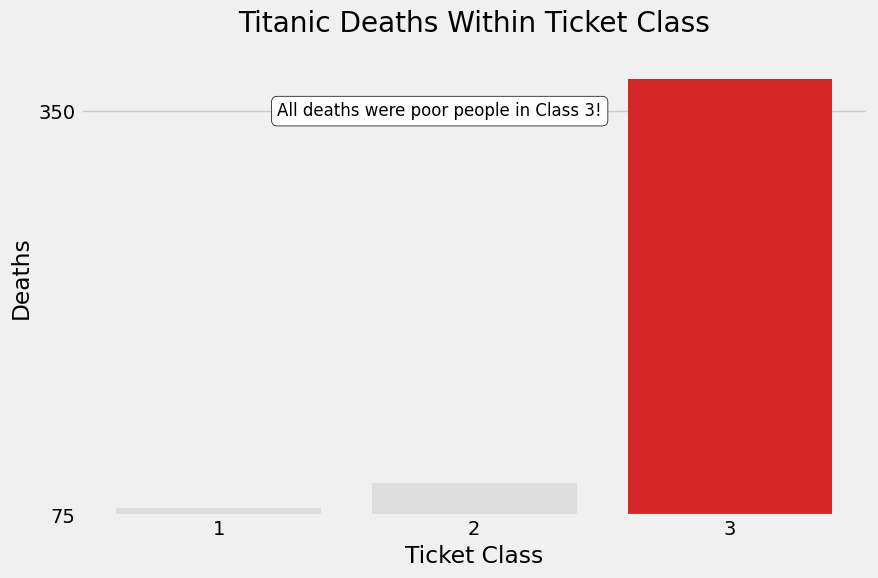

In [61]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.bar(classes, know_deaths_by_class.values, color=[misleading_colors[class_num] for class_num in classes])

ax.set_title("Titanic Deaths Within Ticket Class")
ax.set_xlabel("Ticket Class")
ax.set_xticks([1, 2, 3])

ax.set_ylabel("Deaths")
ax.set_ylim(75, know_deaths_by_class.values.max() * 1.07)
ax.set_yticks([75, 350])
ax.grid(False)
ax.yaxis.grid(True)

ax.text(0.25, 0.87, "All deaths were poor people in Class 3!", transform=ax.transAxes, va="top", ha="left", fontsize=12, bbox=dict(boxstyle="round, pad=0.35", fc="white", ec="black"))

plt.tight_layout()
plt.savefig('../analysis/Ethan_Misleading_TitanicDeathsWithinTicketClass.png')
plt.show()

#### Accurate Visualization

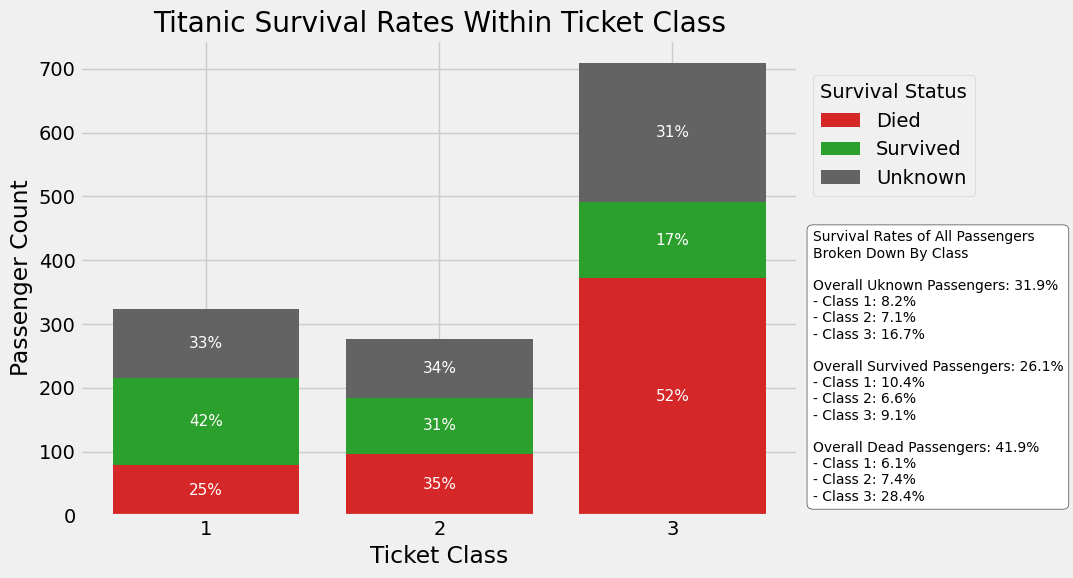

In [62]:
fig, ax = plt.subplots(figsize=(11, 6))

bar_heights = [0.0, 0.0, 0.0]
for status in ["Died", "Survived", "Unknown"]:
    survival_rates = survival_rates_group[status].values
    ax.bar(classes, survival_rates, bottom=bar_heights, color = accurate_colors[status], label = status)
    bar_heights += survival_rates
max_height = np.nanmax(bar_heights)

ax.set_title("Titanic Survival Rates Within Ticket Class")
ax.legend(title="Survival Status", loc="center left", bbox_to_anchor = (1.02, 0.8), borderaxespad = 0)

ax.set_xlabel("Ticket Class")
ax.set_xticks([1, 2, 3])

ax.set_ylabel("Passenger Count")
ax.set_ylim(0, max_height * 1.05)

# overall info box
info_text = (
    "Survival Rates of All Passengers\nBroken Down By Class\n\n"
    f"Overall Uknown Passengers: {overall_unknown_rate:.1%}\n"
    f"- Class 1: {class_rates_percentages.loc[1,'Unknown']:.1%}\n"
    f"- Class 2: {class_rates_percentages.loc[2,'Unknown']:.1%}\n"
    f"- Class 3: {class_rates_percentages.loc[3,'Unknown']:.1%}\n\n"
    f"Overall Survived Passengers: {overall_survived_rate:.1%}\n"
    f"- Class 1: {class_rates_percentages.loc[1,'Survived']:.1%}\n"
    f"- Class 2: {class_rates_percentages.loc[2,'Survived']:.1%}\n"
    f"- Class 3: {class_rates_percentages.loc[3,'Survived']:.1%}\n\n"
    f"Overall Dead Passengers: {overall_died_rate:.1%}\n"
    f"- Class 1: {class_rates_percentages.loc[1,'Died']:.1%}\n"
    f"- Class 2: {class_rates_percentages.loc[2,'Died']:.1%}\n"
    f"- Class 3: {class_rates_percentages.loc[3,'Died']:.1%}"
)
ax.text(1.02, 0.6, info_text, transform=ax.transAxes, ha="left", va="top", fontsize=10, bbox=dict(boxstyle="round, pad=0.4", fc="white", ec="#444444"))

# inner class % labels
status_chunks = [0.0, 0.0, 0.0]
for status in ["Died", "Survived", "Unknown"]:
    vals = survival_rates_group[status].values
    if status == "Died": status_percent = total_died_percent
    elif status == "Survived": status_percent = total_survived_percent
    else: status_percent = total_unknown_percent

    for i, class_num in enumerate(classes):
        y_center = status_chunks[i] + vals[i] / 2
        ax.text(class_num, y_center, f"{status_percent.loc[class_num]:.0%}", ha="center", va="center", fontsize = 11, color="white")

    status_chunks += vals

plt.tight_layout()
plt.savefig('../analysis/Ethan_Accurate_TitanicSurvivalRatesWithinTicketClass.png')
plt.show()

### Survival Rates with Group Size & Gender

In [63]:
df_sexalone_known = df_combined[df_combined["Survived"].notna()].copy()
df_sexalone_known["Survived"] = df_sexalone_known["Survived"].astype(int)

df_sexalone_known["is_alone_male"] = np.where((df_sexalone_known["Sex"] == "male") & (df_sexalone_known["is_alone"] == 1), "Alone Men",  "Everyone Else")

mis_deaths_by_group = df_sexalone_known[df_sexalone_known["Survived"] == 0].groupby("is_alone_male").size().reindex(["Alone Men", "Everyone Else"])
alone_men_death_percent = mis_deaths_by_group.loc["Alone Men"] / mis_deaths_by_group.sum() if mis_deaths_by_group.sum() else 0

solo_group = ["Alone Men", "Everyone Else"]

misleading_group_colors = {"Alone Men": "#d62728", "Everyone Else": "#dddddd"}

In [64]:
df_sexalone_all = df_combined.copy()
df_sexalone_all["survival_status"] = df_sexalone_all.apply(create_survival_status, axis=1)

df_sexalone_all["acc_group"] = np.select(
    [
        (df_sexalone_all["Sex"] == "male") & (df_sexalone_all["is_alone"] == 1),
        (df_sexalone_all["Sex"] == "male") & (df_sexalone_all["is_alone"] == 0),
        (df_sexalone_all["Sex"] == "female") & (df_sexalone_all["is_alone"] == 1),
        (df_sexalone_all["Sex"] == "female") & (df_sexalone_all["is_alone"] == 0),
    ], 
    ["Alone Men", "Family Men", "Alone Women", "Family Women"], default="Other"
)
gender_groups = ["Alone Men", "Family Men", "Alone Women", "Family Women"]
num_of_groups = [0, 1, 2, 3]

sexalone_counts_group = df_sexalone_all.groupby(["acc_group", "survival_status"]).size().unstack().reindex(gender_groups)
sexalone_counts_group = sexalone_counts_group[["Died", "Survived", "Unknown"]]

sexalone_totals = sexalone_counts_group.sum(axis=1)
sexalone_unknown_percent = sexalone_counts_group["Unknown"] / sexalone_totals
sexalone_survived_percent = sexalone_counts_group["Survived"] / sexalone_totals
sexalone_died_percent = sexalone_counts_group["Died"] / sexalone_totals

accurate_colors = {"Died": "#d62728", "Survived": "#2ca02c", "Unknown": "#636363"}

In [65]:
overall_counts2 = df_sexalone_all["survival_status"].value_counts(dropna=False)
overall_total2 = overall_counts2.sum()

overall_died_rate2 = overall_counts2.get("Died", 0) / overall_total2
overall_survived_rate2 = overall_counts2.get("Survived", 0) / overall_total2
overall_unknown_rate2 = overall_counts2.get("Unknown", 0) / overall_total2

sexalone_group_percentages = sexalone_counts_group / overall_total2
overall_died_rate2 = sexalone_group_percentages["Died"].sum()
overall_survived_rate2 = sexalone_group_percentages["Survived"].sum()
overall_unknown_rate2 = sexalone_group_percentages["Unknown"].sum()

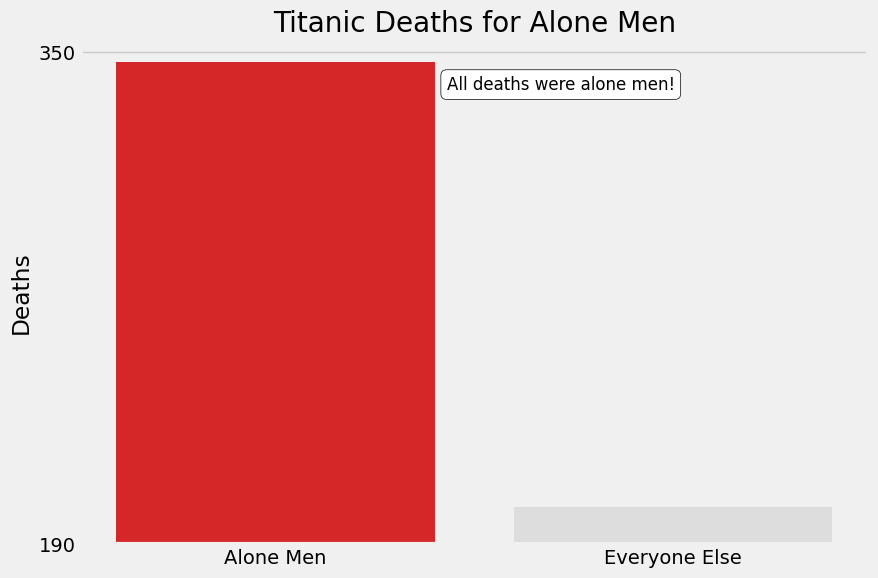

In [66]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.bar(solo_group, mis_deaths_by_group.values, color=[misleading_group_colors[g] for g in solo_group])

ax.set_title("Titanic Deaths for Alone Men")
ax.set_xlabel("")

ax.set_ylabel("Deaths")
ax.set_ylim(190, mis_deaths_by_group.values.max() * 1.02)
ax.set_yticks([190, 350])
ax.grid(False)
ax.yaxis.grid(True)

ax.text(0.465, 0.93, "All deaths were alone men!", transform=ax.transAxes, va="top", ha="left", fontsize=12, bbox=dict(boxstyle="round, pad=0.35", fc="white", ec="black"))

plt.tight_layout()
plt.savefig("../analysis/Ethan_Misleading_TitanicDeathsForAloneMen.png")
plt.show()

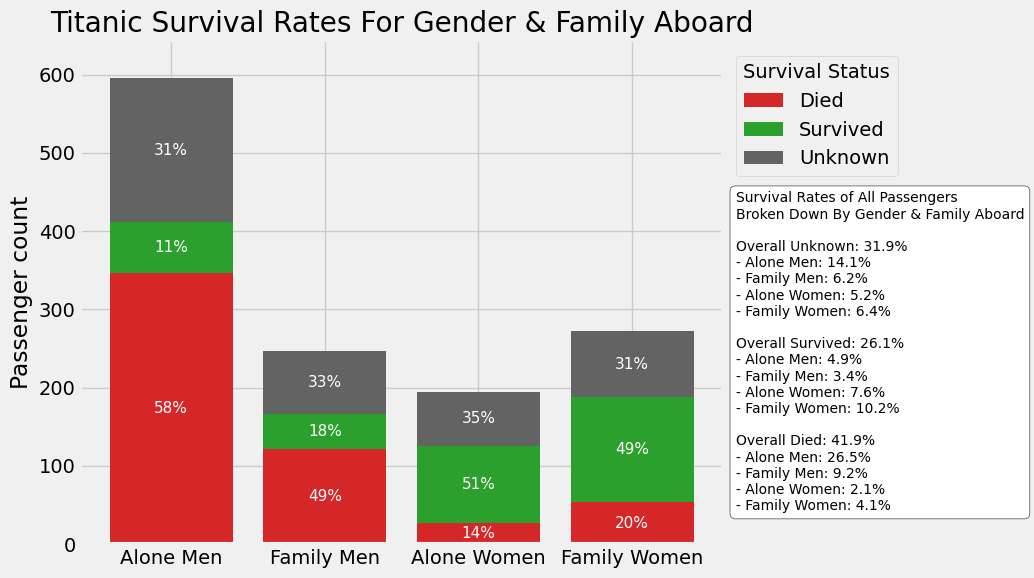

In [67]:
fig, ax = plt.subplots(figsize=(13, 6))
bar_heights = [0, 0, 0, 0]

for status in ["Died", "Survived", "Unknown"]:
    vals = sexalone_counts_group[status].values
    ax.bar(num_of_groups, vals, bottom = bar_heights, color = accurate_colors[status], label = status)
    bar_heights += vals

max_height = np.nanmax(bar_heights)

ax.set_title("Titanic Survival Rates For Gender & Family Aboard")
ax.legend(title="Survival Status", loc="center left", bbox_to_anchor=(1.02, 0.85), borderaxespad=0)

ax.set_xlabel("")
ax.set_xticks(num_of_groups)
ax.set_xticklabels(gender_groups)

ax.set_ylabel("Passenger count")
ax.set_ylim(0, max_height * 1.08)


# overall info box
info_text = (
    "Survival Rates of All Passengers\nBroken Down By Gender & Family Aboard\n\n"
    f"Overall Unknown: {overall_unknown_rate2:.1%}\n"
    f"- Alone Men: {sexalone_group_percentages.loc['Alone Men','Unknown']:.1%}\n"
    f"- Family Men: {sexalone_group_percentages.loc['Family Men','Unknown']:.1%}\n"
    f"- Alone Women: {sexalone_group_percentages.loc['Alone Women','Unknown']:.1%}\n"
    f"- Family Women: {sexalone_group_percentages.loc['Family Women','Unknown']:.1%}\n\n"
    f"Overall Survived: {overall_survived_rate2:.1%}\n"
    f"- Alone Men: {sexalone_group_percentages.loc['Alone Men','Survived']:.1%}\n"
    f"- Family Men: {sexalone_group_percentages.loc['Family Men','Survived']:.1%}\n"
    f"- Alone Women: {sexalone_group_percentages.loc['Alone Women','Survived']:.1%}\n"
    f"- Family Women: {sexalone_group_percentages.loc['Family Women','Survived']:.1%}\n\n"
    f"Overall Died: {overall_died_rate2:.1%}\n"
    f"- Alone Men: {sexalone_group_percentages.loc['Alone Men','Died']:.1%}\n"
    f"- Family Men: {sexalone_group_percentages.loc['Family Men','Died']:.1%}\n"
    f"- Alone Women: {sexalone_group_percentages.loc['Alone Women','Died']:.1%}\n"
    f"- Family Women: {sexalone_group_percentages.loc['Family Women','Died']:.1%}"
)
ax.text(1.02, 0.7, info_text, transform=ax.transAxes, ha="left", va="top", fontsize=10, bbox=dict(boxstyle="round, pad=0.4", fc="white", ec="#444444"))

# inner group % labels
status_chunks = [0.0, 0.0, 0.0, 0.0]
for status in ["Died", "Survived", "Unknown"]:
    vals = sexalone_counts_group[status].values
    if status == "Died": status_percent = sexalone_died_percent
    elif status == "Survived": status_percent = sexalone_survived_percent
    else: status_percent = sexalone_unknown_percent

    for i, group_name in enumerate(gender_groups):
        y_center = status_chunks[i] + vals[i] / 2
        ax.text(i, y_center, f"{status_percent.loc[group_name]:.0%}", ha = "center", va = "center", fontsize = 11, color = "white")
    status_chunks += vals

plt.tight_layout(rect=[0, 0, 0.82, 1])
plt.savefig("../analysis/Ethan_Accurate_TitanicSurvivalRatesForGenderFamilyAboard.png")
plt.show()